In [1]:
import geopandas as gpd

iso_gdf = gpd.read_file('to_all_variables_for_cluster_analysis.shp')

In [2]:
iso_gdf.rename(columns = {'Percentage': 'Percentage of visible minority',
                           'Median tot': 'Median total income of households in 2020 ($)',
                             'Homeowners':'Homeownership rate (%)'}, inplace=True)

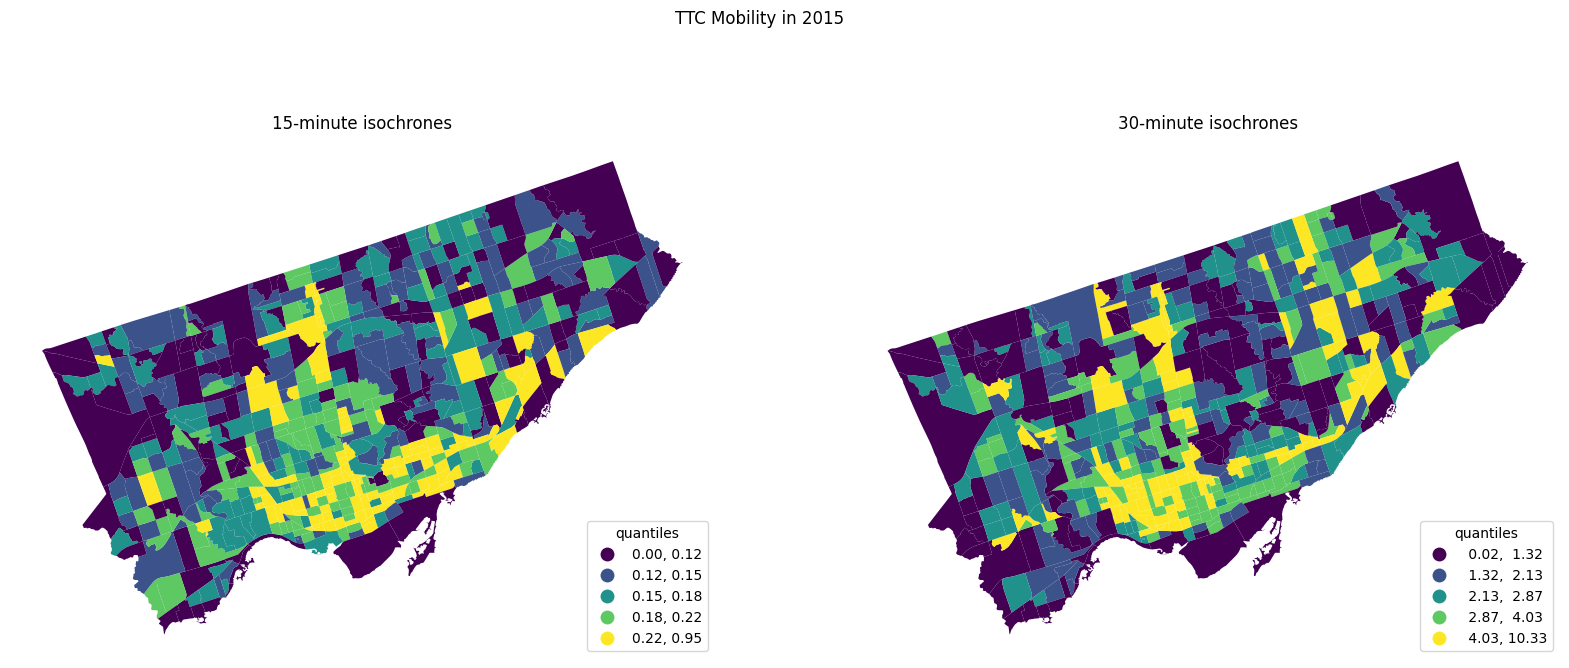

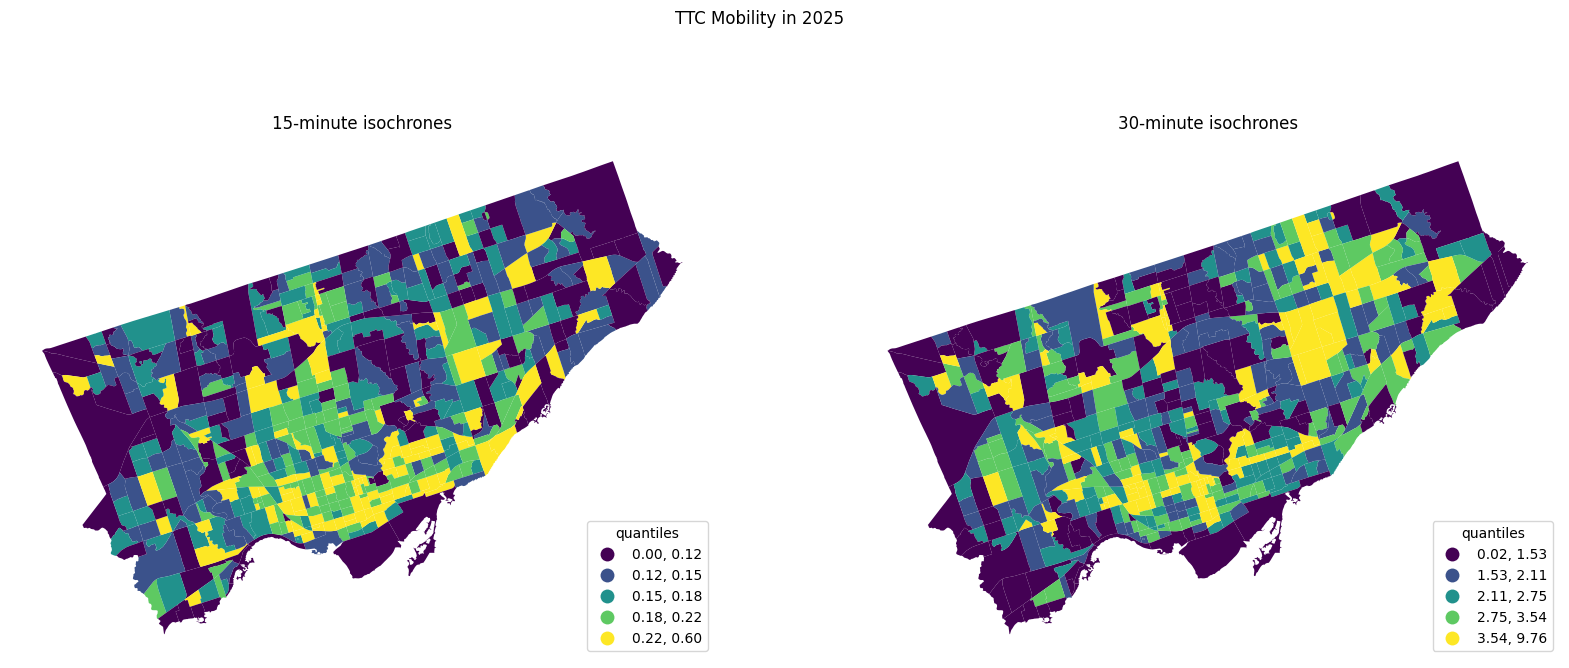

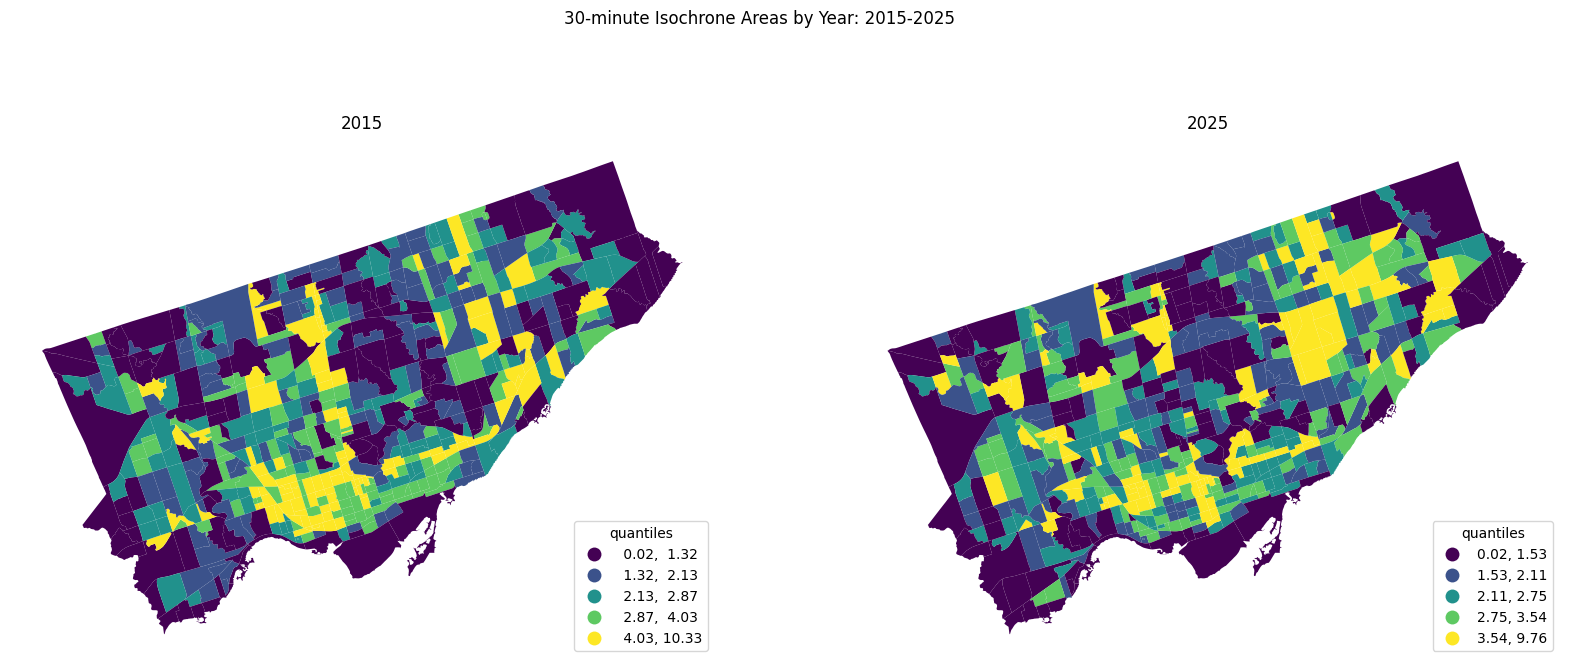

In [3]:
import plotter

f1, ax = plotter.plot_choropleths(iso_gdf, 'TTC Mobility in 2015', titles = ['15-minute isochrones', '30-minute isochrones'],
                         columns = ['15_2015', '30_2015'], cmap = 'viridis')

f2, ax = plotter.plot_choropleths(iso_gdf, 'TTC Mobility in 2025', titles = ['15-minute isochrones', '30-minute isochrones'],
                         columns = ['15_2025', '30_2025'], cmap = 'viridis')

f3, ax = plotter.plot_choropleths(iso_gdf, '30-minute Isochrone Areas by Year: 2015-2025', titles = ['2015', '2025'],
                         columns = ['30_2015', '30_2025'], cmap = 'viridis')




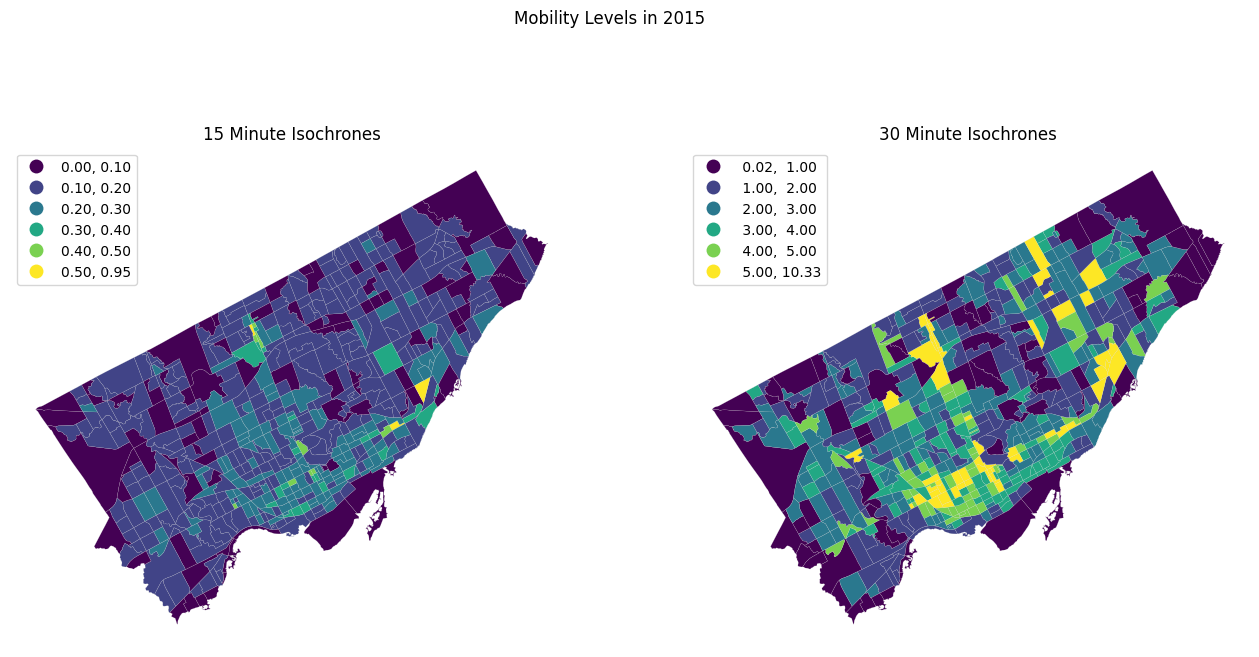

In [4]:
import matplotlib.pyplot as plt

import mapclassify

class_15_2015 = mapclassify.UserDefined(
    iso_gdf['15_2015'], [0.1, 0.2, 0.3, 0.4, 0.5]
)

class_30_2015 = mapclassify.UserDefined(
    iso_gdf['30_2015'], [1,2,3,4,5]
)

iso_gdf = iso_gdf.to_crs(3347)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (16,8))
fig.suptitle('Mobility Levels in 2015')

class_15_2015.plot(iso_gdf, legend=True, axis_on=False, ax=ax1,
                legend_kwds={"loc": "upper left"},cmap = 'viridis')
ax1.set_title('15 Minute Isochrones')
class_30_2015.plot(iso_gdf, legend=True, axis_on=False, ax=ax2,
                legend_kwds={"loc": "upper left"},cmap = 'viridis')
ax2.set_title('30 Minute Isochrones')

fig.savefig('2015 mobility choros.png')
# plotter.plot_subway_lines(fig, ax1, '2015')
# plotter.plot_subway_lines(fig, ax2, '2015')

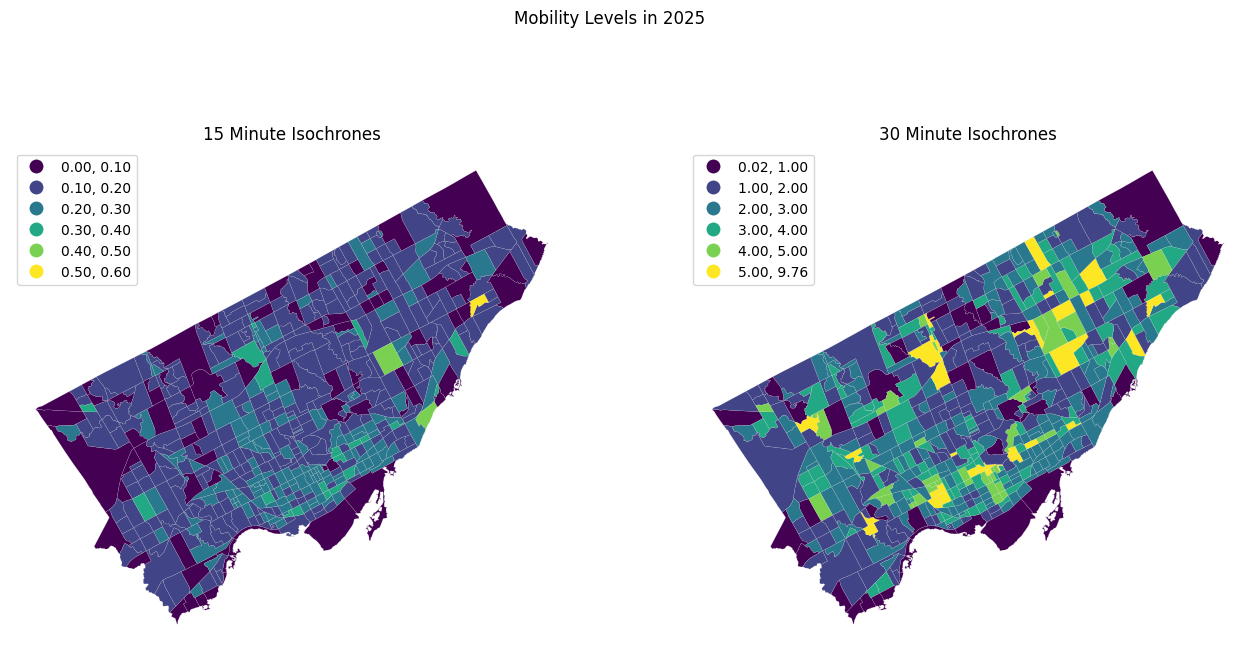

In [5]:
class_15_2025 = mapclassify.UserDefined(
    iso_gdf['15_2025'], [0.1, 0.2, 0.3, 0.4, 0.5]
)

class_30_2025 = mapclassify.UserDefined(
    iso_gdf['30_2025'], [1,2,3,4,5]
)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (16,8))
fig.suptitle('Mobility Levels in 2025')

class_15_2025.plot(iso_gdf, legend=True, axis_on=False, ax=ax1,
                legend_kwds={"loc": "upper left"},cmap = 'viridis')
ax1.set_title('15 Minute Isochrones')
class_30_2025.plot(iso_gdf, legend=True, axis_on=False, ax=ax2,
                legend_kwds={"loc": "upper left"},cmap = 'viridis')
ax2.set_title('30 Minute Isochrones')

fig.savefig('2025 iso choro.png')

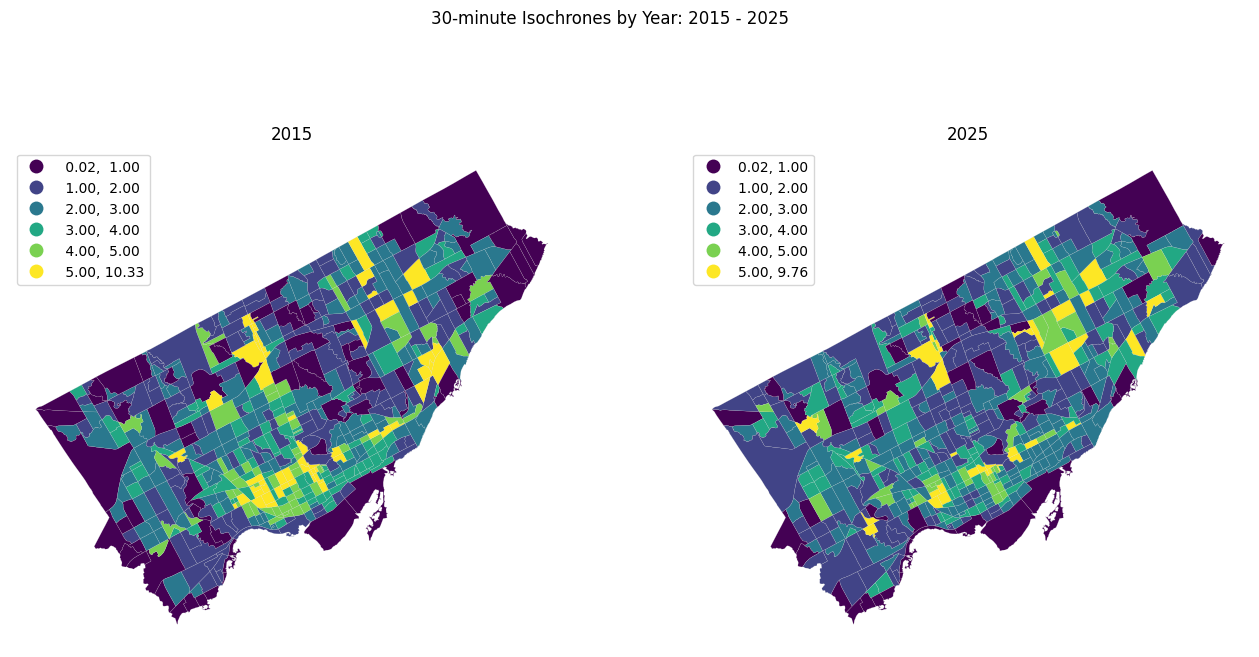

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (16,8))
fig.suptitle('30-minute Isochrones by Year: 2015 - 2025')

class_30_2015.plot(iso_gdf, legend=True, axis_on=False, ax=ax1,
                legend_kwds={"loc": "upper left"},cmap = 'viridis')
ax1.set_title('2015')
class_30_2025.plot(iso_gdf, legend=True, axis_on=False, ax=ax2,
                legend_kwds={"loc": "upper left"},cmap = 'viridis')
ax2.set_title('2025')

fig.savefig('30 minute iso both years.png')

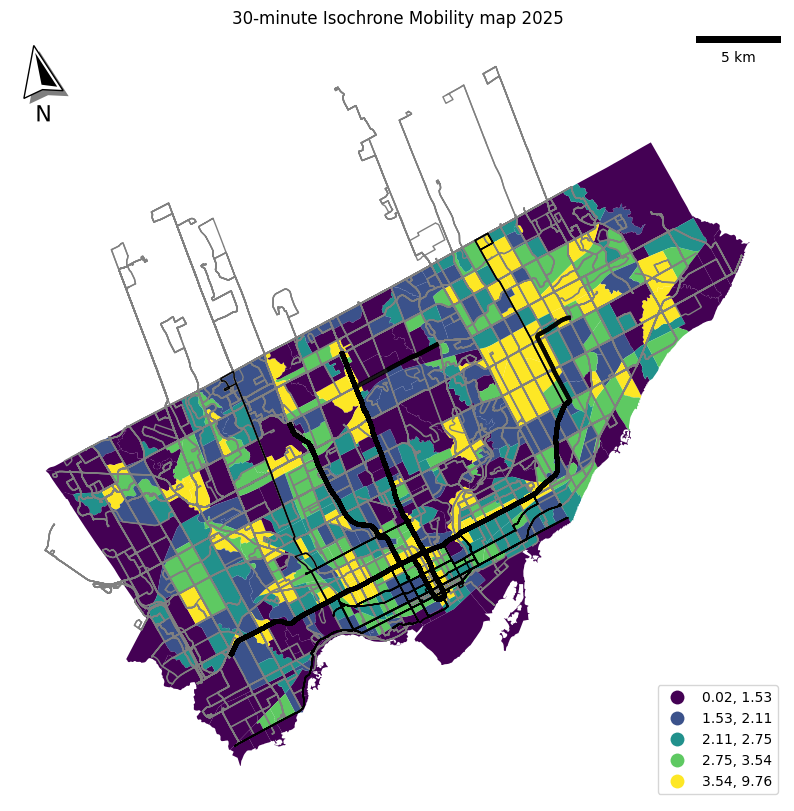

In [8]:
fig, ax = plotter.plot_choropleth(iso_gdf, column = '30_2025',
                                  title = '30-minute Isochrone Mobility map 2025',
                                  cmap = 'viridis')

fig, ax = plotter.plot_bus_lines_2015(fig, ax)
fig, ax = plotter.plot_streetcar_lines_2015(fig, ax)
fig, ax = plotter.plot_subway_lines_2015(fig, ax)

fig.savefig('Sample iso map 30 2025.png')

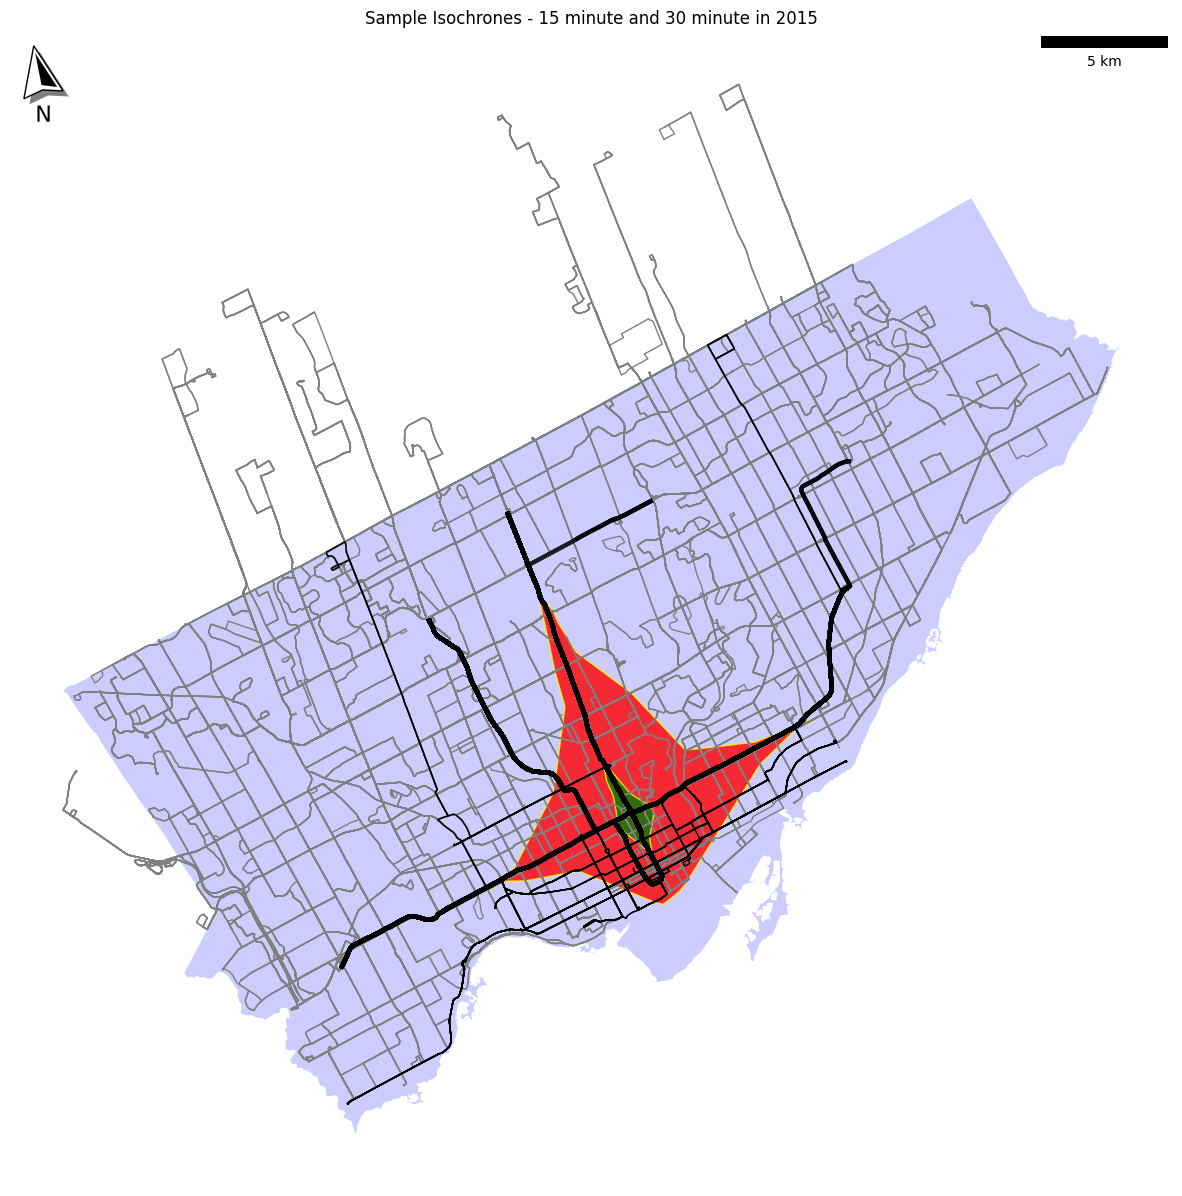

In [28]:
iso_30_2015 = gpd.read_file('isochrones/DGUID_ISO_30min_2015.shp')
iso_15_2015 = gpd.read_file('isochrones/DGUID_ISO_15min_2015.shp')

fig, ax = plt.subplots(figsize = (15,15))
iso_gdf.plot(ax=ax, color = 'blue', alpha = 0.2)
fig, ax = plotter.plot_bus_lines_2015(fig, ax)
fig, ax = plotter.plot_streetcar_lines_2015(fig, ax)
fig, ax = plotter.plot_subway_lines_2015(fig, ax)

iso_30_2015[iso_30_2015['DGUID'] ==  '2021S05075350063.05'].plot(color = 'red', ax=ax, alpha = 0.8, edgecolor='yellow', legend = True)
iso_15_2015[iso_15_2015['DGUID'] ==  '2021S05075350063.05'].plot(color = 'green', ax=ax, alpha = 0.8, edgecolor='yellow')
ax.set_axis_off()
ax.set_title('Sample Isochrones - 15 minute and 30 minute in 2015')
from plotter import ScaleBar, north_arrow

ax.add_artist(ScaleBar(1))
north_arrow(ax, location="upper left", rotation={"crs": iso_gdf.crs, "reference": "center"})

fig.savefig('sample isochrone visual.png')